# 05_04: Smoothing Time Series Data

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def fillnans(array):#function to change nans to average values
    x = np.arange(len(array)) # (in this case, np array: [0, 1, 2, 3, ...365])
    good = ~np.isnan(array) #shows the values that are not nans, aka [335, nan, 70] -> [True, False, True]

    return np.interp(x, x[good], array[good]) #x_good is the dates we know are not nan, array is the temps we know that are not nan
#function interprets the leftover x days which accout for the nan days

In [3]:
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000)

Using ('USW00021504', 19.7192, -155.0489, 8.8, 'HI', 'HILO INTL AP 87', 'GSN', '', '91285').


In [4]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX']) #replacing the database with the full one

In [5]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN']) #hile lists of 365 lists of 2 items, a high and low temp, and these functions pick out a certain value

(19.102739726027398, 14.4, 23.3)

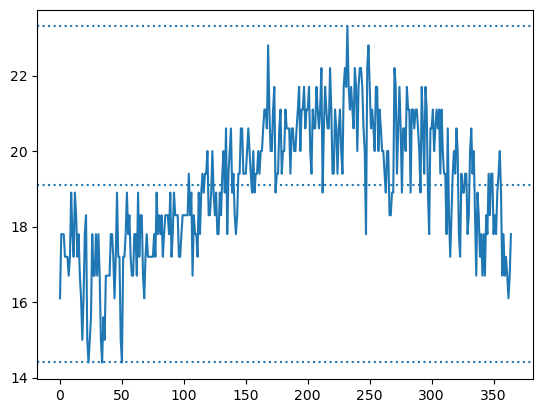

In [6]:
pp.plot(hilo['TMIN'])

# plot horizontal lines at mean, min, and max of TMIN data
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')#prints horizontal line

In [8]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))#np.var explains the variance, or standard deviation^2, so the sqrt is standard deviation

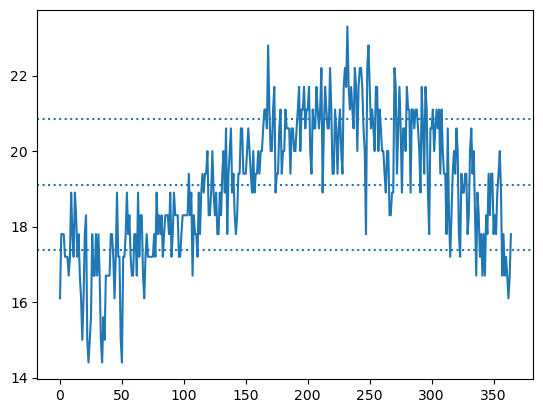

In [9]:
pp.plot(hilo['TMIN'])

# plot horizontal lines at mean, mean - std error, and mean + std error
for value in [mean, mean - err, mean + err]: #mean +/- err is showing the standard deviation as this is how it is calculated
    pp.axhline(value, linestyle=':')
#shows the first standard deviation, where most of the values are stored

In [10]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP'] #getweather.getyear('HILO', ['PRCP'], 2000) displays array of 365 1 item tuples, so the {'PRCP'} at the end makes it 1d array

In [13]:
getweather.getyear('HILO', ['PRCP'], 2000)

array([(0.000e+00,), (8.000e+00,), (3.000e+01,), (1.300e+01,),
       (6.600e+01,), (8.600e+01,), (2.310e+02,), (9.100e+01,),
       (9.100e+01,), (1.350e+02,), (4.100e+01,), (6.350e+02,),
       (1.214e+03,), (4.300e+01,), (2.570e+02,), (5.660e+02,),
       (2.720e+02,), (2.010e+02,), (8.600e+01,), (6.900e+01,),
       (1.170e+02,), (1.420e+02,), (3.000e+00,), (0.000e+00,),
       (0.000e+00,), (3.000e+01,), (3.600e+01,), (1.500e+01,),
       (3.300e+01,), (5.000e+00,), (2.300e+01,), (5.000e+00,),
       (5.000e+00,), (0.000e+00,), (0.000e+00,), (0.000e+00,),
       (0.000e+00,), (0.000e+00,), (0.000e+00,), (0.000e+00,),
       (0.000e+00,), (3.000e+00,), (0.000e+00,), (0.000e+00,),
       (0.000e+00,), (0.000e+00,), (2.300e+01,), (0.000e+00,),
       (0.000e+00,), (0.000e+00,), (0.000e+00,), (1.000e+01,),
       (1.000e+01,), (1.500e+01,), (0.000e+00,), (2.800e+01,),
       (1.000e+01,), (0.000e+00,), (0.000e+00,), (2.300e+01,),
       (5.100e+01,), (2.800e+01,), (6.900e+01,), (5.800

In [14]:
rain

array([0.000e+00, 8.000e+00, 3.000e+01, 1.300e+01, 6.600e+01, 8.600e+01,
       2.310e+02, 9.100e+01, 9.100e+01, 1.350e+02, 4.100e+01, 6.350e+02,
       1.214e+03, 4.300e+01, 2.570e+02, 5.660e+02, 2.720e+02, 2.010e+02,
       8.600e+01, 6.900e+01, 1.170e+02, 1.420e+02, 3.000e+00, 0.000e+00,
       0.000e+00, 3.000e+01, 3.600e+01, 1.500e+01, 3.300e+01, 5.000e+00,
       2.300e+01, 5.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 1.000e+01, 1.500e+01,
       0.000e+00, 2.800e+01, 1.000e+01, 0.000e+00, 0.000e+00, 2.300e+01,
       5.100e+01, 2.800e+01, 6.900e+01, 5.800e+01, 5.000e+00, 1.800e+01,
       5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 1.500e+02,
       1.500e+01, 2.000e+01, 5.000e+00, 6.400e+01, 

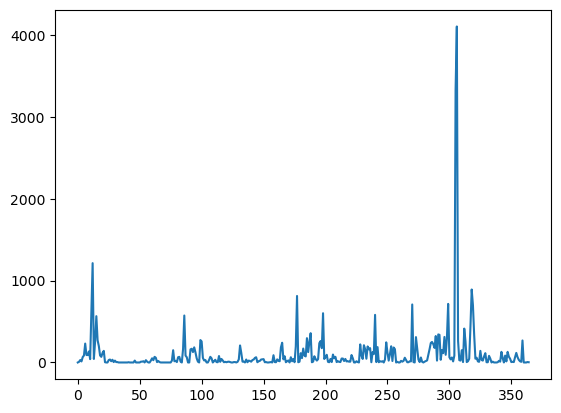

In [15]:
pp.plot(rain)

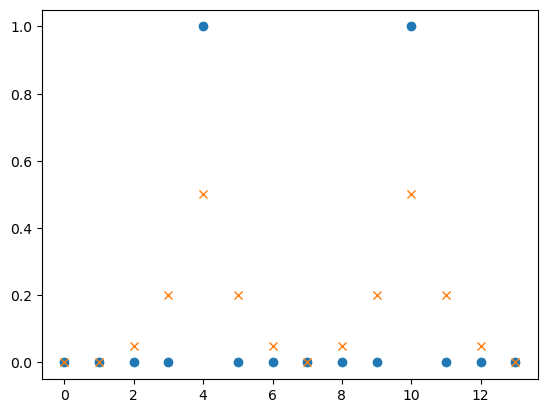

In [16]:
# show the effects of correlating a sparse vector
# with a triangular mask

x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])

mask = np.array([0.05,0.2,0.5,0.2,0.05]) #multiplies each item in x array with this mask, so only the items with one are multiplies with this mask
y = np.correlate(x, mask, 'same')#correlate multiplies the 1s with the mask, putting the middle of the masked array * 1 in the middle and the 0.05, 0.2, and other values * 1 in around the edges

pp.plot(x, 'o')

pp.plot(y, 'x')

In [17]:
np.ones(10) / 10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

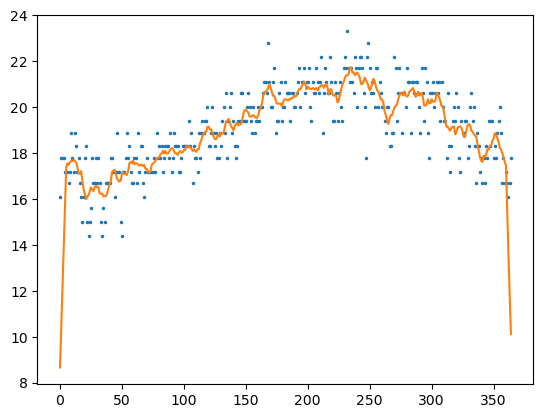

In [18]:
# TMIN data, smoothed with uniform mask of length 10;
# perform partial correlation on boundaries (mode = "same")

pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))

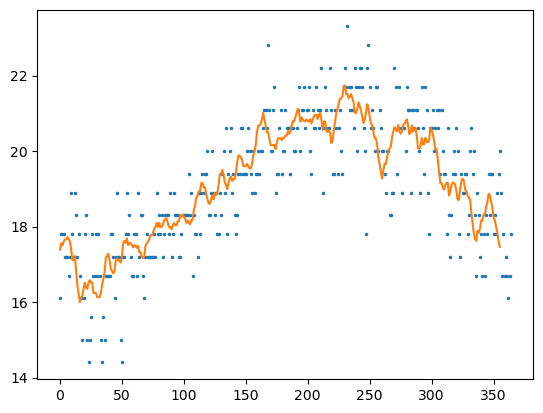

In [19]:
# TMIN data, smoothed with uniform mask of length 10;
# drop boundary values that cannot be fully correlated (mode = "valid")

pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))

In [20]:
# smooth any array

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)# the bigger the window is, the smoother the graph will be

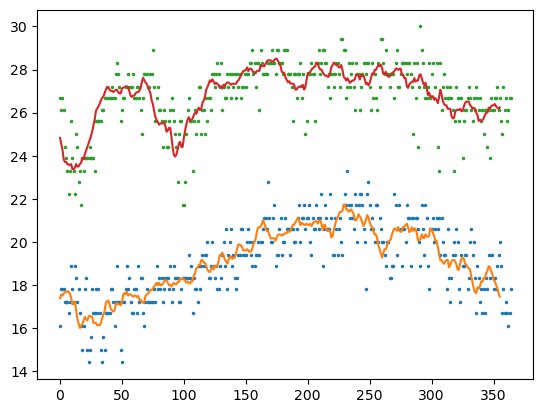

In [30]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(smooth(hilo['TMAX'], 10))

In [31]:
# load TMIN and TMAX data for a station and year; fill NaNs;
# plot unsmoothed data as dots, smoothed data as lines,
# dropping boundary values and adjusting x axis consistently

def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)#getting data

    for obs in ['TMIN','TMAX']:   
        stationdata[obs] = fillnans(stationdata[obs])#filling the nans
    
        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)#plotting the dots
        pp.plot(range(10,356), smooth(stationdata[obs], 20))#plotting the smoothdata
    
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(1.0, 365.0, 15.0, 30.0)

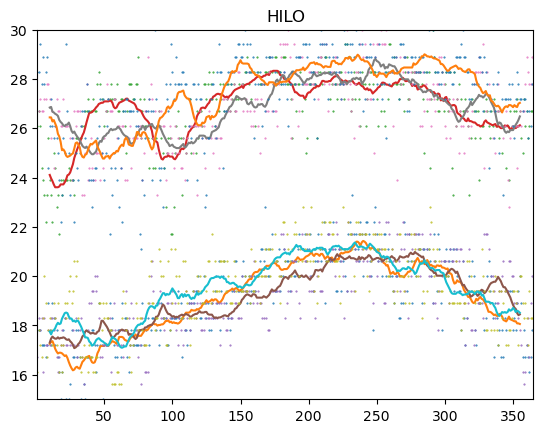

In [32]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

pp.axis(ymin=15,ymax=30)

In [34]:
import ssl #doesn't create the error that the text files have expired
ssl._create_default_https_context = ssl._create_unverified_context

Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO INTL AP', 'GSN', '', '72290').
Using ('USW00014922', 44.8853, -93.2314, 254.5, 'MN', 'MINNEAPOLIS-ST PAUL INTL AP', 'GSN', 'HCN', '72658').


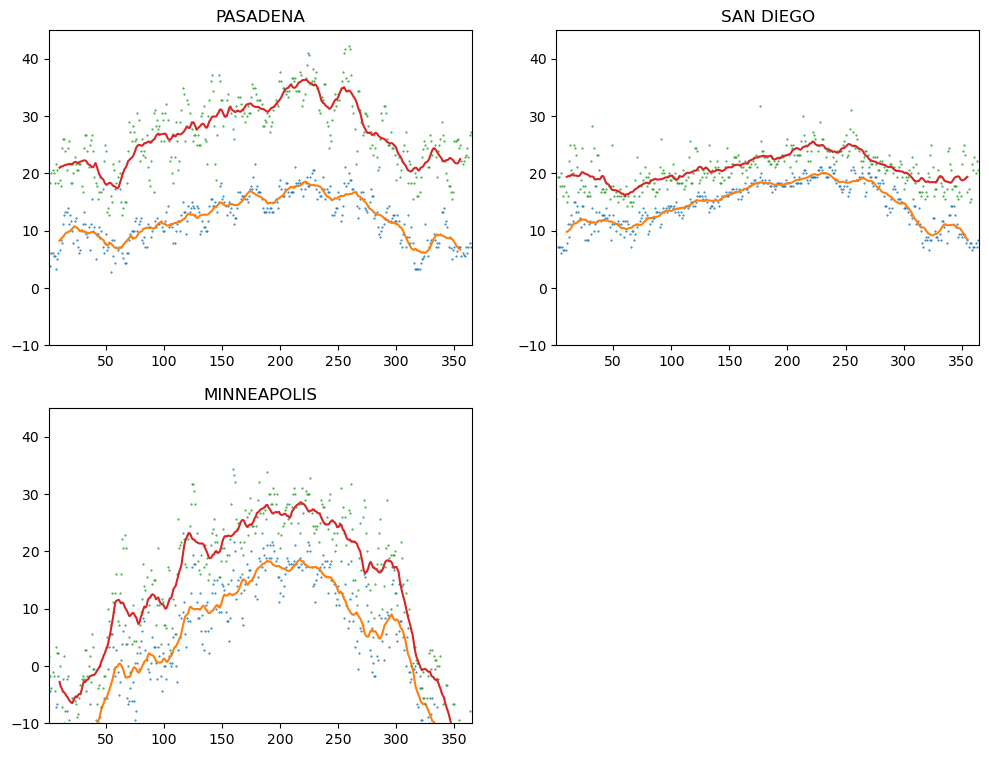

In [36]:
# plot four cities in a two-by-two grid

pp.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA','SAN DIEGO','MINNEAPOLIS']):#enumerate is (0, PASADENA)
    pp.subplot(2,2,i+1) #2 by 2, index is where spot is placed
    plotsmooth(city, 2000)